# <center> POSTGRADUATE CERTIFICATE PROGRAM IN DATA SCIENCE AND MACHINE LEARNING (PGCP-DSML)</center>

## <center> Hackathon 2  </center>

## Submitted by 
- Shanthi S Guru
- Ankur Patel
- Rekha Mishra
- Ekta Upadhyay
- Sindhu Nair
- Mohit Pareek
- Rajeev Sharma
- Sachin Ralhan


In [1]:
## Importing required Libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
#import missingno as msn

In [2]:

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [3]:
# read training and test dataset

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head(5)

customer_id      destination  passanger weather  temperature  time  \
0       258868  No Urgent Place  Friend(s)   Sunny           80   6PM   
1       318369             Work      Alone   Sunny           80   7AM   
2       320906  No Urgent Place      Alone   Sunny           80  10AM   
3       412393             Work      Alone   Rainy           55   7AM   
4       290854             Home      Alone   Snowy           30   6PM   

            coupon expiration  gender age  ... CoffeeHouse  CarryAway  \
0  Restaurant(<20)         1d    Male  21  ...         1~3        4~8   
1  Restaurant(<20)         2h    Male  21  ...         1~3        4~8   
2     Coffee House         2h  Female  21  ...         gt8        4~8   
3  Restaurant(<20)         2h  Female  26  ...       less1        4~8   
4     Coffee House         1d    Male  31  ...       less1        4~8   

  RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
0                  4~8            never                1                 1   
1                  1~3            less1                1                 0   
2                  1~3              1~3                1                 1   
3                  1~3            never                1                 1   
4                less1            never                1                 1   

  toCoupon_GEQ25min direction_same direction_opp  Y  
0                 0              0             1  1  
1                 0              1             0  0  
2                 0              0             1  0  
3                 1              0             1  0  
4                 0              0             1  0  

[5 rows x 27 columns]

In [4]:
display(df_train.shape)
df_train.Y.value_counts()

# it is found that the distribution of 0 and 1 class balanced

(10147, 27)

1    5768
0    4379
Name: Y, dtype: int64

In [5]:
display(df_test.shape)


(2537, 26)

## Data Quality check

In [6]:
df_train.info()

# it is found that some of the features have null values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           10147 non-null  int64 
 1   destination           10147 non-null  object
 2   passanger             10147 non-null  object
 3   weather               10147 non-null  object
 4   temperature           10147 non-null  int64 
 5   time                  10147 non-null  object
 6   coupon                10147 non-null  object
 7   expiration            10147 non-null  object
 8   gender                10147 non-null  object
 9   age                   10147 non-null  object
 10  maritalStatus         10147 non-null  object
 11  has_children          10147 non-null  int64 
 12  education             10147 non-null  object
 13  occupation            10147 non-null  object
 14  income                10147 non-null  object
 15  car                   84 non-null   

In [7]:
df_train.describe()

customer_id   temperature  has_children  toCoupon_GEQ5min  \
count   10147.000000  10147.000000  10147.000000           10147.0   
mean   311272.276831     63.172366      0.412634               1.0   
std    106781.701016     19.232595      0.492332               0.0   
min    123472.000000     30.000000      0.000000               1.0   
25%    221439.000000     55.000000      0.000000               1.0   
50%    310062.000000     80.000000      0.000000               1.0   
75%    401537.000000     80.000000      1.000000               1.0   
max    499988.000000     80.000000      1.000000               1.0   

       toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  direction_opp  \
count       10147.000000       10147.000000    10147.000000   10147.000000   
mean            0.563024           0.119838        0.212181       0.787819   
std             0.496037           0.324788        0.408872       0.408872   
min             0.000000           0.000000        0.000000       0.000000   
25%             0.000000           0.000000        0.000000       1.000000   
50%             1.000000           0.000000        0.000000       1.000000   
75%             1.000000           0.000000        0.000000       1.000000   
max             1.000000           1.000000        1.000000       1.000000   

                  Y  
count  10147.000000  
mean       0.568444  
std        0.495318  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [8]:
# Value Checking of each feature
for col in df_test.columns:
    print('Values in Column {}:'.format(col))
    print(df_test[col].unique())
    print()

Values in Column customer_id:
[374679 469678 216140 ... 356159 218541 467387]

Values in Column destination:
['No Urgent Place' 'Home' 'Work']

Values in Column passanger:
['Friend(s)' 'Alone' 'Partner' 'Kid(s)']

Values in Column weather:
['Sunny' 'Rainy' 'Snowy']

Values in Column temperature:
[80 55 30]

Values in Column time:
['6PM' '10AM' '7AM' '10PM' '2PM']

Values in Column coupon:
['Coffee House' 'Carry out & Take away' 'Bar' 'Restaurant(<20)'
 'Restaurant(20-50)']

Values in Column expiration:
['1d' '2h']

Values in Column gender:
['Female' 'Male']

Values in Column age:
['below21' '21' '26' '50plus' '46' '31' '36' '41']

Values in Column maritalStatus:
['Single' 'Unmarried partner' 'Married partner' 'Divorced' 'Widowed']

Values in Column has_children:
[0 1]

Values in Column education:
['Some college - no degree' 'High School Graduate' 'Associates degree'
 'Bachelors degree' 'Graduate degree (Masters or Doctorate)'
 'Some High School']

Values in Column occupation:
['Healthc

In [9]:
df_train.passanger.value_counts()

Alone        5802
Friend(s)    2676
Partner       855
Kid(s)        814
Name: passanger, dtype: int64

In [10]:
df_train.isna().sum()

customer_id                 0
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     10063
Bar                        88
CoffeeHouse               172
CarryAway                 122
RestaurantLessThan20       97
Restaurant20To50          148
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [11]:
df_test.isna().sum()

customer_id                0
destination                0
passanger                  0
weather                    0
temperature                0
time                       0
coupon                     0
expiration                 0
gender                     0
age                        0
maritalStatus              0
has_children               0
education                  0
occupation                 0
income                     0
car                     2513
Bar                       19
CoffeeHouse               45
CarryAway                 29
RestaurantLessThan20      33
Restaurant20To50          41
toCoupon_GEQ5min           0
toCoupon_GEQ15min          0
toCoupon_GEQ25min          0
direction_same             0
direction_opp              0
dtype: int64

In [12]:
# dropping car feature as is it null

df_train.drop(['car'], axis=1, inplace=True)
df_test.drop(['car'], axis=1, inplace=True)

In [13]:
num_df = df_train.select_dtypes(include = ['int64','float64'])

cat_df = df_train.select_dtypes(include = ['object'])



### Missing Value Imputation

In [14]:
# fill null values of train data with mode for categoricals

df_train['Bar'] = df_train['Bar'].fillna(df_train['Bar'].mode()[0])
df_train['CoffeeHouse'] = df_train['CoffeeHouse'].fillna(df_train['CoffeeHouse'].mode()[0])
df_train['CarryAway'] = df_train['CarryAway'].fillna(df_train['CarryAway'].mode()[0])
df_train['RestaurantLessThan20'] = df_train['RestaurantLessThan20'].fillna(df_train['RestaurantLessThan20'].mode()[0])
df_train['Restaurant20To50'] = df_train['Restaurant20To50'].fillna(df_train['Restaurant20To50'].mode()[0])

# test data
df_test['Bar'] = df_test['Bar'].fillna(df_test['Bar'].mode()[0])
df_test['CoffeeHouse'] = df_test['CoffeeHouse'].fillna(df_test['CoffeeHouse'].mode()[0])
df_test['CarryAway'] = df_test['CarryAway'].fillna(df_test['CarryAway'].mode()[0])
df_test['RestaurantLessThan20'] = df_test['RestaurantLessThan20'].fillna(df_test['RestaurantLessThan20'].mode()[0])
df_test['Restaurant20To50'] = df_test['Restaurant20To50'].fillna(df_test['Restaurant20To50'].mode()[0])



In [15]:
df_train.isna().sum()

customer_id             0
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [16]:
df_test.isna().sum()

customer_id             0
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
dtype: int64

In [17]:
cat_df = df_train.select_dtypes(include = ['object'])


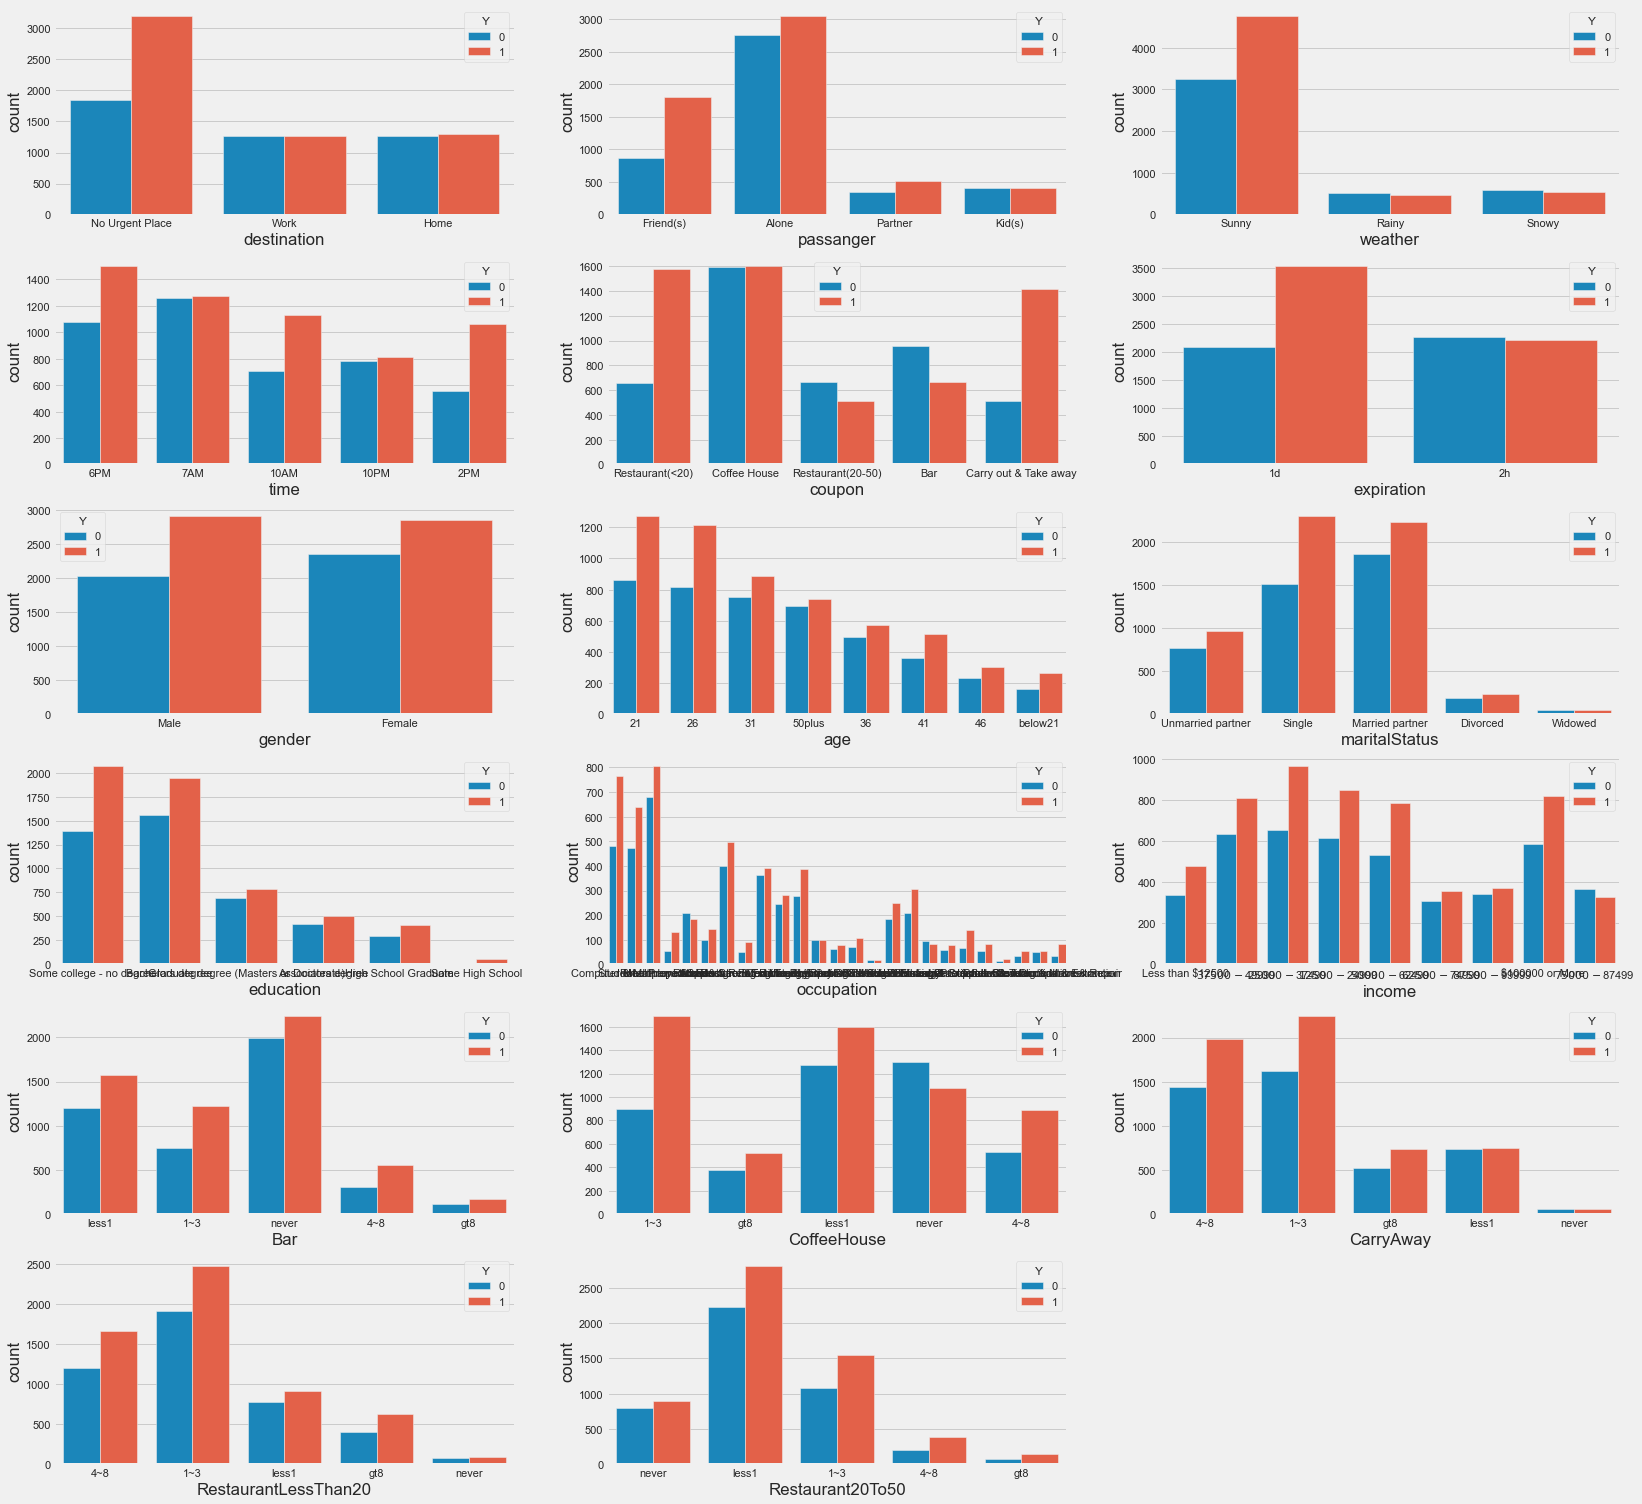

In [18]:
plot_categoricals = cat_df
count = 1
fig, axes = plt.subplots(2,2, figsize=(25,25), sharex=True, sharey=True)
for col in plot_categoricals:
    ax1 = plt.subplot(6,3, count )
    
    sns.countplot(x=col, data=df_train, ax=ax1, hue='Y')
    count += 1
plt.show()

In [19]:
# value is 1. Hence dropping the column
df_train.drop(['toCoupon_GEQ5min'], axis=1, inplace=True)
df_test.drop(['toCoupon_GEQ5min'], axis=1, inplace=True)


In [20]:
df_distance = df_train.copy()

df_distance['distance'] = None
df_distance.loc[df_distance['toCoupon_GEQ15min'] == 0, 'distance'] = 0

df_distance.loc[(df_distance['toCoupon_GEQ15min'] == 1) & \
             (df_distance['toCoupon_GEQ25min'] == 0), 'distance'] = 1
             
df_distance.loc[df_distance['toCoupon_GEQ25min'] == 1, 'distance'] = 2
#df_train.distance.isna().sum()


df_distance.distance = df_distance.distance.astype('int64')
#df_train.distance.unique()

df_distance.distance.value_counts()
df_distance.drop(columns=['toCoupon_GEQ15min', 'toCoupon_GEQ25min'], inplace=True)


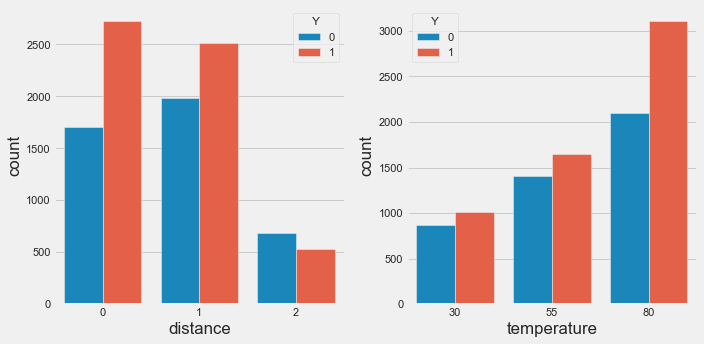

In [21]:

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()

for ax, col in zip(axes, ['distance', 'temperature']):
    sns.countplot(x=col, hue='Y', data=df_distance, 
                  ax=ax);

plt.tight_layout()
plt.show()

In [22]:
cols = df_train.drop(['Y'], axis=1).columns
cols

Index(['customer_id', 'destination', 'passanger', 'weather', 'temperature',
       'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus',
       'has_children', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp'],
      dtype='object')

<AxesSubplot:>

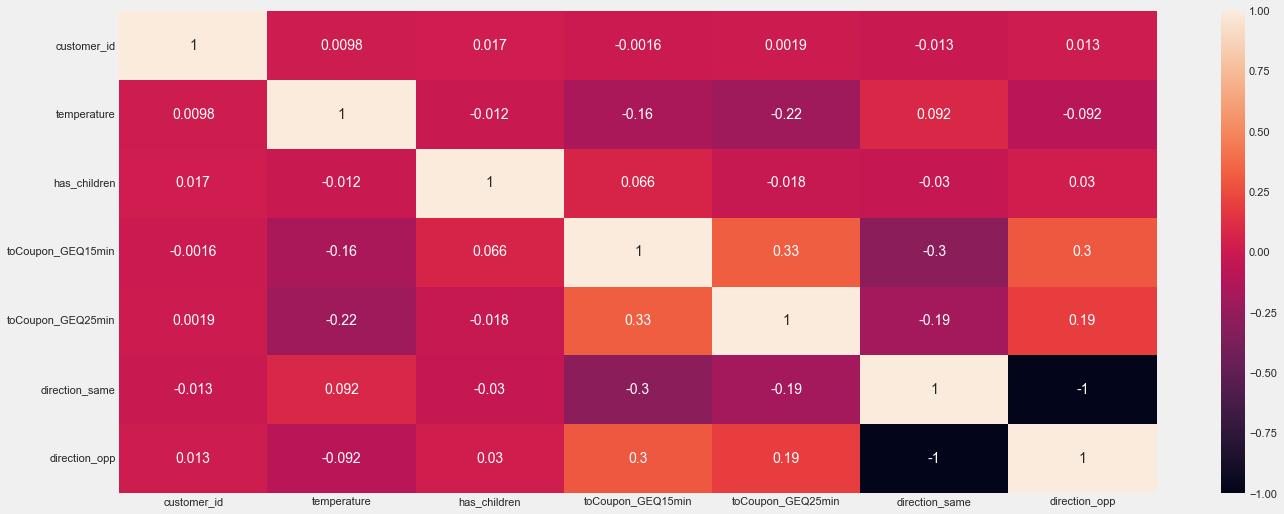

In [23]:
sns.heatmap(df_train[cols].corr(), annot=True)

In [24]:
# direction_same and direction_opp are negatively correlated
# we can remove one of them

#df_train.drop('direction_opp', axis=1, inplace=True)

### Label / One Hot Encoding for the Categorical Features

In [25]:
num_df = df_train.select_dtypes(include = ['int64','float64'])
num_df.columns

Index(['customer_id', 'temperature', 'has_children', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')

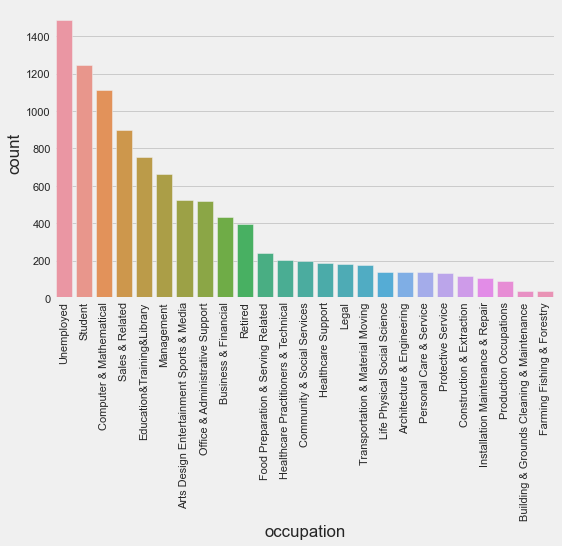

In [26]:
fig, axes = plt.subplots(1,1, figsize=(8,5), sharex=True, sharey=True)


sns.countplot(x='occupation', data=df_train, order=df_train['occupation'].value_counts().index)
plt.xticks(rotation=90);

In [27]:
others = ['Student' ,'Unemployed' ,'Retired' ]

# all other occupation will be termed as employed
# label encoding values as
# Student = 0
# UnEmployed = 1
# Retired = 3
# All others are considered as Employed and assigned a value of 2

def occpn_employed(occupation):
    #display(occupation)
    if occupation not in others:
        
        return 2
    elif occupation == 'Student':
        return 0
    elif occupation == 'Unemployed':
        return 1
    else :
        return 3

In [28]:
# train Data
df_train['occupation'] = df_train['occupation'].apply(occpn_employed)
df_train.head()

# test data
df_test['occupation'] = df_test['occupation'].apply(occpn_employed)
df_test.head()



customer_id      destination  passanger weather  temperature  time  \
0       374679  No Urgent Place  Friend(s)   Sunny           80   6PM   
1       469678             Home      Alone   Sunny           80   6PM   
2       216140  No Urgent Place      Alone   Rainy           55  10AM   
3       184301  No Urgent Place    Partner   Sunny           80   6PM   
4       148720             Work      Alone   Sunny           30   7AM   

                  coupon expiration  gender      age  ...            income  \
0           Coffee House         1d  Female  below21  ...  Less than $12500   
1  Carry out & Take away         2h    Male       21  ...   $12500 - $24999   
2           Coffee House         1d  Female       26  ...   $25000 - $37499   
3                    Bar         1d    Male   50plus  ...   $50000 - $62499   
4  Carry out & Take away         1d  Female       26  ...   $75000 - $87499   

     Bar CoffeeHouse  CarryAway RestaurantLessThan20 Restaurant20To50  \
0  never         1~3      less1                  4~8            less1   
1    1~3       never        gt8                  4~8              1~3   
2  never       never        1~3                less1            never   
3  never         4~8        4~8                  1~3            less1   
4  never       never        1~3                  4~8            less1   

  toCoupon_GEQ15min toCoupon_GEQ25min direction_same direction_opp  
0                 0                 0              0             1  
1                 1                 0              1             0  
2                 1                 0              0             1  
3                 1                 0              0             1  
4                 1                 0              0             1  

[5 rows x 24 columns]

In [29]:
# Label encoding of categoricals 


# train data
df_dest = pd.get_dummies(df_train['destination'], prefix='dest')
df_pass = pd.get_dummies(df_train['passanger'], prefix='pass')
df_weather = pd.get_dummies(df_train['weather'], prefix='weather')
df_coupon = pd.get_dummies(df_train['coupon'], prefix='coupon')
df_gender = pd.get_dummies(df_train['gender'], prefix='gender')
df_mar = pd.get_dummies(df_train['maritalStatus'], prefix='mar')

new_features = pd.DataFrame()
new_features = pd.concat((new_features, df_dest), axis=1)
new_features = pd.concat((new_features, df_pass), axis=1)
new_features = pd.concat((new_features, df_weather), axis=1)
new_features = pd.concat((new_features, df_coupon), axis=1)
new_features = pd.concat((new_features, df_gender), axis=1)
new_features = pd.concat((new_features, df_mar), axis=1)

In [30]:
# concat columns from new features to the pre_process_data if the columns dont already exist.
# if they exist, drop them and add 

for new_col in new_features.columns:
    if new_col in df_train.columns:
        df_train.drop(new_col, axis=1, inplace=True)
        
df_train = pd.concat((df_train, new_features), axis=1)    

df_train.drop(['destination', 'passanger', 
                       'weather', 'coupon', 'gender', 'maritalStatus']  , axis=1, inplace=True)


In [31]:
df_train.columns

Index(['customer_id', 'temperature', 'time', 'expiration', 'age',
       'has_children', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y', 'dest_Home', 'dest_No Urgent Place', 'dest_Work',
       'pass_Alone', 'pass_Friend(s)', 'pass_Kid(s)', 'pass_Partner',
       'weather_Rainy', 'weather_Snowy', 'weather_Sunny', 'coupon_Bar',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'gender_Female',
       'gender_Male', 'mar_Divorced', 'mar_Married partner', 'mar_Single',
       'mar_Unmarried partner', 'mar_Widowed'],
      dtype='object')

In [32]:
# Label encoding of categoricals 

# test data
df_dest = pd.get_dummies(df_test['destination'], prefix='dest')
df_pass = pd.get_dummies(df_test['passanger'], prefix='pass')
df_weather = pd.get_dummies(df_test['weather'], prefix='weather')
df_coupon = pd.get_dummies(df_test['coupon'], prefix='coupon')
df_gender = pd.get_dummies(df_test['gender'], prefix='gender')
df_mar = pd.get_dummies(df_test['maritalStatus'], prefix='mar')

new_features = pd.DataFrame()
new_features = pd.concat((new_features, df_dest), axis=1)
new_features = pd.concat((new_features, df_pass), axis=1)
new_features = pd.concat((new_features, df_weather), axis=1)
new_features = pd.concat((new_features, df_coupon), axis=1)
new_features = pd.concat((new_features, df_gender), axis=1)
new_features = pd.concat((new_features, df_mar), axis=1)

In [33]:
for new_col in new_features.columns:
    if new_col in df_test.columns:
            df_test.drop(new_col, axis=1, inplace=True)
        
        
df_test = pd.concat((df_test, new_features), axis=1)  

df_test.drop(['destination', 'passanger', 
                       'weather', 'coupon', 'gender', 'maritalStatus']  , axis=1, inplace=True)

In [34]:
df_test.columns

Index(['customer_id', 'temperature', 'time', 'expiration', 'age',
       'has_children', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'dest_Home', 'dest_No Urgent Place', 'dest_Work',
       'pass_Alone', 'pass_Friend(s)', 'pass_Kid(s)', 'pass_Partner',
       'weather_Rainy', 'weather_Snowy', 'weather_Sunny', 'coupon_Bar',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'gender_Female',
       'gender_Male', 'mar_Divorced', 'mar_Married partner', 'mar_Single',
       'mar_Unmarried partner', 'mar_Widowed'],
      dtype='object')

In [35]:
#train data

df_train['age'] = df_train['age'].replace('50plus', '51').replace('below21', '20')
df_train['age'].value_counts()

# test data
df_test['age'] = df_test['age'].replace('50plus', '51').replace('below21', '20')


In [36]:
df_train['age'] = df_train['age'].astype('int64')
df_test['age'] = df_test['age'].astype('int64')


In [37]:
# create bins
df_train['age'].unique()

array([21, 26, 31, 51, 36, 41, 46, 20])

<Figure size 576x288 with 0 Axes>

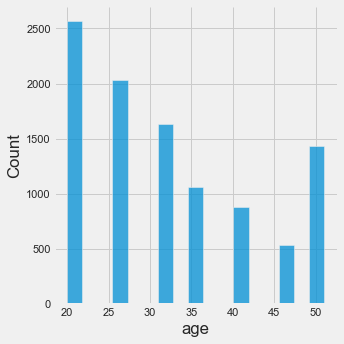

In [38]:
plt.figure(figsize=(8,4))
sns.displot(x='age', data=df_train)

plt.show()

In [39]:
bins = [0,20,35,50, 100]
labels = [0,1,2,3]
df_train['age'] = pd.cut(df_train.age, bins=bins, labels=labels, include_lowest=True)
df_test['age'] = pd.cut(df_test.age, bins=bins, labels=labels, include_lowest=True)

In [40]:
df_train['age'] = df_train['age'].astype('int64')
df_test['age']  = df_test['age'].astype('int64')

In [41]:
# label encoding of Education 

replacer= {"education":{"Some High School": 1, 
                    "High School Graduate": 2,
                    "Some college - no degree": 3,
                    "Associates degree": 4,
                    "Bachelors degree": 5,
                    "Graduate degree (Masters or Doctorate)": 6,
          }}
df_train = df_train.replace(replacer)
df_test = df_test.replace(replacer)



In [42]:
# bar

# label encoding of bar 

replacer= {"Bar":{"never": 1, 
                    "less1": 2,
                    "1~3": 3,
                    "4~8": 4,
                    "gt8": 5
          }}
df_train = df_train.replace(replacer)
df_test = df_test.replace(replacer)



In [43]:

replacer= {"CoffeeHouse":{"never": 1, 
                    "less1": 2,
                    "1~3": 3,
                    "4~8": 4,
                    "gt8": 5
          }}
df_train = df_train.replace(replacer)
df_test = df_test.replace(replacer)



In [44]:

replacer= {"CarryAway":{"never": 1, 
                    "less1": 2,
                    "1~3": 3,
                    "4~8": 4,
                    "gt8": 5
          }}
df_train = df_train.replace(replacer)
df_test = df_test.replace(replacer)



In [45]:

replacer= {"RestaurantLessThan20":{"never": 1, 
                    "less1": 2,
                    "1~3": 3,
                    "4~8": 4,
                    "gt8": 5
          }}
df_train = df_train.replace(replacer)
df_test = df_test.replace(replacer)



In [46]:

replacer= {"Restaurant20To50":{"never": 1, 
                    "less1": 2,
                    "1~3": 3,
                    "4~8": 4,
                    "gt8": 5
          }}
df_train = df_train.replace(replacer)
df_test = df_test.replace(replacer)


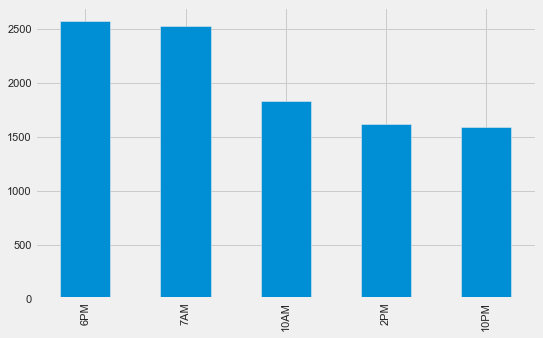

In [47]:
fig, axes = plt.subplots(1,1, figsize=(8,5), sharex=True, sharey=True)

df_train["time"].value_counts().plot(kind='bar')
#sns.countplot(x='occupation', data=df_train, ax=axes)
plt.xticks(rotation=90);

In [48]:


replacer= {"time":{"7AM": 1, 
                    "10AM": 2,
                    "2PM": 3,
                    "6PM": 4,
                    "10PM": 5
          }}
df_train = df_train.replace(replacer)
df_test = df_test.replace(replacer)


In [49]:

replacer= {"expiration":{"1d": 1, 
                    "2h": 2

          }}
df_train = df_train.replace(replacer)
df_test = df_test.replace(replacer)


In [50]:
df_train['income'].unique()

array(['Less than $12500', '$37500 - $49999', '$25000 - $37499',
       '$12500 - $24999', '$50000 - $62499', '$62500 - $74999',
       '$87500 - $99999', '$100000 or More', '$75000 - $87499'],
      dtype=object)

In [51]:

replacer= {"income":{"Less than $12500": 1, 
                    "$12500 - $24999": 2,
                    "$25000 - $37499": 3,
                    "$37500 - $49999": 4,
                    "$50000 - $62499": 5,
                    "$62500 - $74999": 6,
                    "$75000 - $87499": 7,
                    "$87500 - $99999": 8,
                    "$100000 or More": 9,
                     
                     
          }}
df_train = df_train.replace(replacer)
df_test = df_test.replace(replacer)


In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   customer_id                   10147 non-null  int64
 1   temperature                   10147 non-null  int64
 2   time                          10147 non-null  int64
 3   expiration                    10147 non-null  int64
 4   age                           10147 non-null  int64
 5   has_children                  10147 non-null  int64
 6   education                     10147 non-null  int64
 7   occupation                    10147 non-null  int64
 8   income                        10147 non-null  int64
 9   Bar                           10147 non-null  int64
 10  CoffeeHouse                   10147 non-null  int64
 11  CarryAway                     10147 non-null  int64
 12  RestaurantLessThan20          10147 non-null  int64
 13  Restaurant20To50              1

In [53]:
cols = df_train.drop(['Y'], axis=1).columns
cols

Index(['customer_id', 'temperature', 'time', 'expiration', 'age',
       'has_children', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'dest_Home', 'dest_No Urgent Place', 'dest_Work',
       'pass_Alone', 'pass_Friend(s)', 'pass_Kid(s)', 'pass_Partner',
       'weather_Rainy', 'weather_Snowy', 'weather_Sunny', 'coupon_Bar',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'gender_Female',
       'gender_Male', 'mar_Divorced', 'mar_Married partner', 'mar_Single',
       'mar_Unmarried partner', 'mar_Widowed'],
      dtype='object')

<AxesSubplot:>

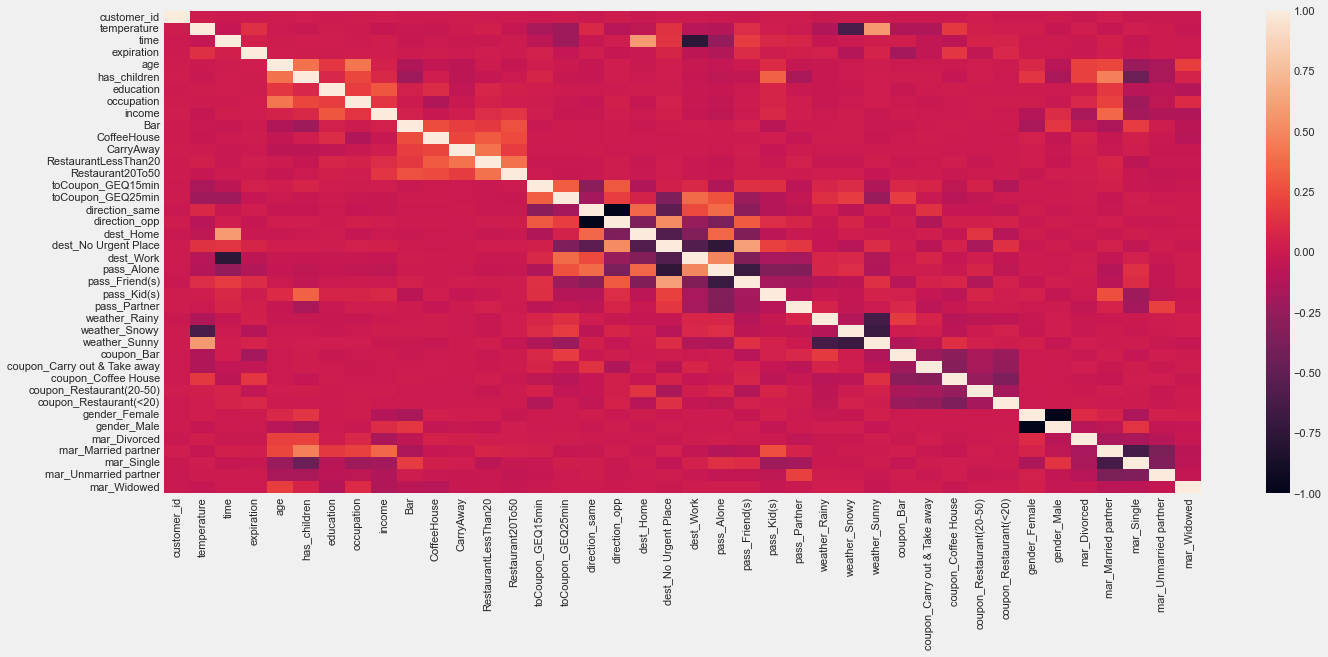

In [54]:
sns.heatmap(df_train[cols].corr())

### Correlation between features

In [55]:
df_train.head()


customer_id  temperature  time  expiration  age  has_children  education  \
0       258868           80     4           1    1             0          3   
1       318369           80     1           2    1             0          5   
2       320906           80     2           2    1             0          3   
3       412393           55     1           2    1             0          5   
4       290854           30     4           1    1             0          3   

   occupation  income  Bar  ...  coupon_Coffee House  \
0           0       1    2  ...                    0   
1           0       4    2  ...                    0   
2           0       1    2  ...                    1   
3           2       3    2  ...                    0   
4           1       2    3  ...                    1   

   coupon_Restaurant(20-50)  coupon_Restaurant(<20)  gender_Female  \
0                         0                       1              0   
1                         0                       1              0   
2                         0                       0              1   
3                         0                       1              1   
4                         0                       0              0   

   gender_Male  mar_Divorced  mar_Married partner  mar_Single  \
0            1             0                    0           0   
1            1             0                    0           1   
2            0             0                    1           0   
3            0             0                    0           1   
4            1             0                    0           1   

   mar_Unmarried partner  mar_Widowed  
0                      1            0  
1                      0            0  
2                      0            0  
3                      0            0  
4                      0            0  

[5 rows x 41 columns]

In [56]:
df_train.to_csv('Data_Preprocess_Train.csv', index=False)
df_test.to_csv('Data_Preprocess_Test.csv', index=False)

In [57]:
input_file = "Data_Preprocess_Train.csv"
test_file = "Data_Preprocess_Test.csv"


In [58]:
# set to true if best parameters need to be calculated using gridsearch
get_params = True
RANDOM_STATE = 42

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [60]:
# get current time for creating folder for saving predictions

from datetime import datetime

now = datetime.now() # current date and time
dt = now.strftime("%m/%d/%Y, %H:%M:%S")
dt = dt.replace(',',"")
dt = dt.replace('/',"-")
dt = dt.replace(':',"-")
print("current time:-", dt)


current time:- 04-05-2022 23-21-06


In [61]:
# create folder name with timestamp to store metrics and target data
folder_name = 'Predictions/' + dt +'/'
display(folder_name)

# create folder
import os
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

'Predictions/04-05-2022 23-21-06/'

In [62]:
# Xdata and ydata are training data
# Using grid search to get the best parameters for the model

def get_best_params(model, param_range, Xdata, ydata):
    
    # cv_param = GridSearchCV(estimator=model, param_grid= param_range, cv=5, return_train_score=True, scoring='f1').fit(Xdata, ydata)
    
    cv_param = RandomizedSearchCV(estimator = model, param_distributions = param_range, n_iter = 10, verbose=5, cv = 10, random_state=RANDOM_STATE, n_jobs = -1, scoring='f1').fit(Xdata, ydata)
    display()
    return(cv_param.best_params_)

In [63]:
# function to get model metrics

def get_model_metrics(actual, predicted, classifier_name):
    
    acc            = accuracy_score(actual, predicted)
    f1             = np.mean(f1_score(actual, predicted, average=None))
    
    tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
#    tn, fp, fn, tp = calc_from_conf_matrix(actual, predicted)
    sensitivity    = tp / (tp + fn)
    specificity    = tn / (tn + fp)
    fpr, tpr, thresholds = roc_curve(actual, predicted, pos_label=1)
    auc_value      = auc(fpr, tpr)
    
    display(acc)
    return {'Classifier_Name': classifier_name,
            'Accuracy'       : acc,
            'F1_Score'       : f1,
            'Sensitivity'    : sensitivity,
            'Specificity'    : specificity,
            'AUC'            : auc_value,
            'FPR_Values'     : fpr,
            'TPR_Values'     : tpr}

In [64]:
# function that gets does prediction and plots results

def perform_classification_function(model_name, model_instance, Xtrain, Xtest, ytrain, ytest):
    
    # predict y using the model instance
    ypred   = model_instance.predict(Xtest)
    
#    fig, (axes1, axes2) = plt.subplots(1,2, figsize=(15,5))
    fig, axes1 = plt.subplots(1,1, figsize=(6,4))
    
    print("Classification Report")
    print("=====================")
    print(classification_report(ytest, ypred))
    
    print("Confusion Matrix")
    print("================")
#    print(confusion_matrix(ytest, ypred))
    
# display the heatmap and decision boundaries map side-by-side
    sns.heatmap(confusion_matrix(ytest, ypred), annot=True, cmap='crest',  linewidths=0.5, ax=axes1,fmt='d')
    
    
    model_metrics = get_model_metrics(ytest, ypred, model_name)
    
    
    return model_metrics

In [65]:
# create dataframe with model metrics for displaying the results

column_names = ["Classifier_Name", "Param_List","Accuracy", 'F1_Score', "Sensitivity", "Specificity",\
                "AUC", "FPR_Values", "TPR_Values"]
metrics_df   = pd.DataFrame(columns=column_names)
metrics_df

Empty DataFrame
Columns: [Classifier_Name, Param_List, Accuracy, F1_Score, Sensitivity, Specificity, AUC, FPR_Values, TPR_Values]
Index: []

In [66]:
# reading the data which was output from EDA
# some columns had special characters, hence they are being renamed

data = pd.read_csv(input_file)
data.columns = ['customer_id', 'temperature', 'time', 'expiration', 'age',
       'has_children', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y', 'dest_Home', 'dest_No Urgent Place', 'dest_Work',
       'pass_Alone', 'pass_Friends', 'pass_Kids', 'pass_Partner',
       'weather_Rainy', 'weather_Snowy', 'weather_Sunny', 'coupon_Bar',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant_20_50', 'coupon_Restaurant_20', 'gender_Female',
       'gender_Male', 'mar_Divorced', 'mar_Married partner', 'mar_Single',
       'mar_Unmarried partner', 'mar_Widowed']
data.head()

customer_id  temperature  time  expiration  age  has_children  education  \
0       258868           80     4           1    1             0          3   
1       318369           80     1           2    1             0          5   
2       320906           80     2           2    1             0          3   
3       412393           55     1           2    1             0          5   
4       290854           30     4           1    1             0          3   

   occupation  income  Bar  ...  coupon_Coffee House  coupon_Restaurant_20_50  \
0           0       1    2  ...                    0                        0   
1           0       4    2  ...                    0                        0   
2           0       1    2  ...                    1                        0   
3           2       3    2  ...                    0                        0   
4           1       2    3  ...                    1                        0   

   coupon_Restaurant_20  gender_Female  gender_Male  mar_Divorced  \
0                     1              0            1             0   
1                     1              0            1             0   
2                     0              1            0             0   
3                     1              1            0             0   
4                     0              0            1             0   

   mar_Married partner  mar_Single  mar_Unmarried partner  mar_Widowed  
0                    0           0                      1            0  
1                    0           1                      0            0  
2                    1           0                      0            0  
3                    0           1                      0            0  
4                    0           1                      0            0  

[5 rows x 41 columns]

In [67]:
X_scaled = data.drop(['customer_id','Y'], axis=1)
y = data['Y']

In [68]:
X_scaled.shape

(10147, 39)

In [69]:
from collections import Counter
print(Counter(y))

Counter({1: 5768, 0: 4379})


In [70]:
y = np.array(y).reshape(-1,1)
y.shape

(10147, 1)

In [71]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y, test_size=0.15, random_state=RANDOM_STATE,
                                               stratify=y)

In [72]:
from sklearn.metrics import accuracy_score, f1_score

In [73]:
metrics_df.drop(['FPR_Values','TPR_Values'], axis=1)

Empty DataFrame
Columns: [Classifier_Name, Param_List, Accuracy, F1_Score, Sensitivity, Specificity, AUC]
Index: []

### Modeling

It was found that XGBClassifier gave the best F1_score.<br>
Its parameters were generated using RandomizedSearchCV.
Hence our final model is XGBClassifier with the parameters as defined below:

model=XGBClassifier(base_score=0.5, colsample_bylevel=0.75, colsample_bytree=0.6,
       gamma=0, learning_rate=0.085, max_depth=13,
       min_child_weight=0.7, missing=None, n_estimators=200, nthread=-1,
       objective='binary:logistic', reg_alpha=0.7, reg_lambda=2,
       scale_pos_weight=1, seed=1, silent=True, subsample=1, random_state=42)

model.fit(Xtrain, ytrain)

XGBClassifier(colsample_bylevel=0.75, colsample_bytree=0.6, learning_rate=0.085,
              max_depth=13, min_child_weight=0.7, n_estimators=200, nthread=-1,
              random_state=42, reg_alpha=0.7, reg_lambda=2, seed=1,
              silent=True)

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.73      0.75       657
           1       0.80      0.83      0.81       866

    accuracy                           0.79      1523
   macro avg       0.78      0.78      0.78      1523
weighted avg       0.78      0.79      0.78      1523

Confusion Matrix


0.7852921864740644

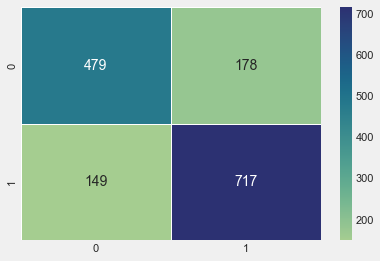

In [74]:
metrics_df = metrics_df.iloc[0:0]


count = 1
inst_list = []

model_name = 'XGBClassifier'
model=XGBClassifier(base_score=0.5, colsample_bylevel=0.75, colsample_bytree=0.6,
       gamma=0, learning_rate=0.085, max_depth=13,
       min_child_weight=0.7, missing=None, n_estimators=200, nthread=-1,
       objective='binary:logistic', reg_alpha=0.7, reg_lambda=2,
       scale_pos_weight=1, seed=1, silent=True, subsample=1, random_state=42).fit(Xtrain, ytrain)

display(model)

model_metrics = perform_classification_function(model_name, model, Xtrain, Xtest, ytrain, ytest )

inst_list.append(model)

parameters = ["base_score=0.5, colsample_bylevel=0.75, colsample_bytree=0.6, gamma=0, learning_rate=0.085, max_depth=13, min_child_weight=0.7, missing=None, n_estimators=200, nthread=-1, objective='binary:logistic', reg_alpha=0.7, reg_lambda=2, scale_pos_weight=1, seed=1, silent=True, subsample=1, random_state=42"]
metrics_df = metrics_df.append(model_metrics, ignore_index=True)
metrics_df.loc[(metrics_df.Classifier_Name == model_name),['Param_List']] = parameters


plt.show();

print("=====================================================================================================")


In [75]:
display(metrics_df)

Classifier_Name                                         Param_List  \
0   XGBClassifier  base_score=0.5, colsample_bylevel=0.75, colsam...   

   Accuracy  F1_Score  Sensitivity  Specificity       AUC  \
0  0.785292  0.779918     0.827945     0.729072  0.778508   

                       FPR_Values                      TPR_Values  
0  [0.0, 0.2709284627092846, 1.0]  [0.0, 0.8279445727482679, 1.0]

In [76]:
data_test = pd.read_csv(test_file)
data_test.columns = ['customer_id','temperature', 'time', 'expiration', 'age', 'has_children', 'education',
       'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'dest_Home',
       'dest_No Urgent Place', 'dest_Work', 'pass_Alone', 'pass_Friends',
       'pass_Kids', 'pass_Partner', 'weather_Rainy', 'weather_Snowy',
       'weather_Sunny', 'coupon_Bar', 'coupon_Carry out & Take away',
       'coupon_Coffee House', 'coupon_Restaurant_20_50',
       'coupon_Restaurant_20', 'gender_Female', 'gender_Male',
       'mar_Divorced', 'mar_Married partner', 'mar_Single',
       'mar_Unmarried partner', 'mar_Widowed']
data_test.drop("customer_id", axis=1, inplace=True)
data_test.head()

temperature  time  expiration  age  has_children  education  occupation  \
0           80     4           1    0             0          3           2   
1           80     4           2    1             0          2           2   
2           55     2           1    1             1          3           1   
3           80     4           1    3             1          4           3   
4           30     1           1    1             0          3           2   

   income  Bar  CoffeeHouse  ...  coupon_Coffee House  \
0       1    1            3  ...                    1   
1       2    3            1  ...                    0   
2       3    1            1  ...                    1   
3       5    1            4  ...                    0   
4       7    1            1  ...                    0   

   coupon_Restaurant_20_50  coupon_Restaurant_20  gender_Female  gender_Male  \
0                        0                     0              1            0   
1                        0                     0              0            1   
2                        0                     0              1            0   
3                        0                     0              0            1   
4                        0                     0              1            0   

   mar_Divorced  mar_Married partner  mar_Single  mar_Unmarried partner  \
0             0                    0           1                      0   
1             0                    0           0                      1   
2             0                    1           0                      0   
3             0                    0           0                      1   
4             0                    1           0                      0   

   mar_Widowed  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 39 columns]

In [77]:
ypred = model.predict(data_test)


In [78]:
# read the test file to obtain customer_id

data_test_df=pd.read_csv(test_file)
data_test_df.head()


customer_id  temperature  time  expiration  age  has_children  education  \
0       374679           80     4           1    0             0          3   
1       469678           80     4           2    1             0          2   
2       216140           55     2           1    1             1          3   
3       184301           80     4           1    3             1          4   
4       148720           30     1           1    1             0          3   

   occupation  income  Bar  ...  coupon_Coffee House  \
0           2       1    1  ...                    1   
1           2       2    3  ...                    0   
2           1       3    1  ...                    1   
3           3       5    1  ...                    0   
4           2       7    1  ...                    0   

   coupon_Restaurant(20-50)  coupon_Restaurant(<20)  gender_Female  \
0                         0                       0              1   
1                         0                       0              0   
2                         0                       0              1   
3                         0                       0              0   
4                         0                       0              1   

   gender_Male  mar_Divorced  mar_Married partner  mar_Single  \
0            0             0                    0           1   
1            1             0                    0           0   
2            0             0                    1           0   
3            1             0                    0           0   
4            0             0                    1           0   

   mar_Unmarried partner  mar_Widowed  
0                      0            0  
1                      1            0  
2                      0            0  
3                      1            0  
4                      0            0  

[5 rows x 40 columns]

In [79]:
# create submission file with test customers and their predictions

submission_df=pd.DataFrame({
    "customer_id": data_test_df['customer_id'],
    "Y": ypred
})

submission_df.shape, data_test_df.shape

((2537, 2), (2537, 40))

In [80]:
submission_df.to_csv('submission_xgb.csv', index=False)